In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#loadingdataset
df=pd.read_csv("Churn_Modelling (1).csv")

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


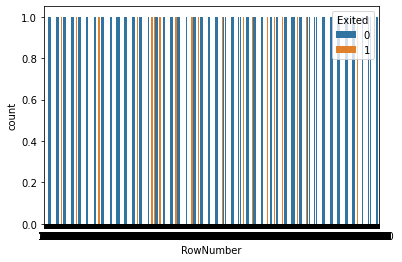

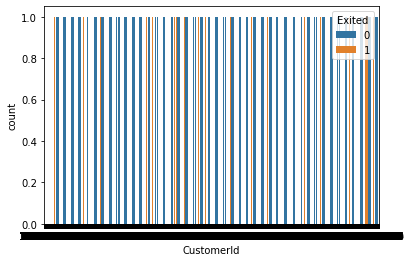

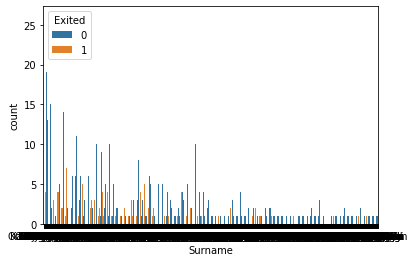

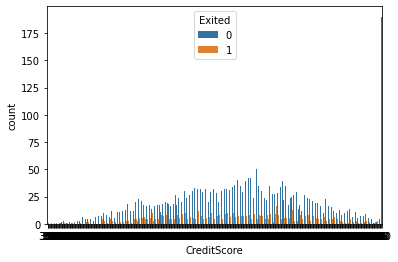

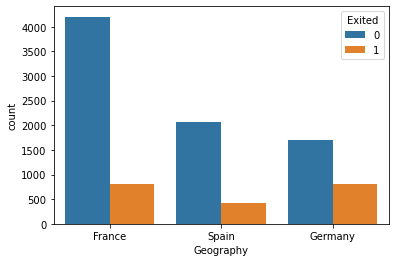

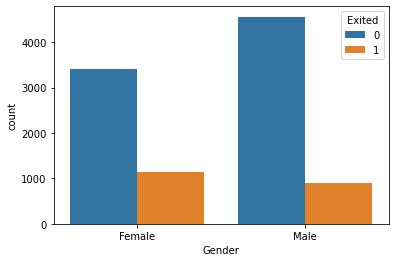

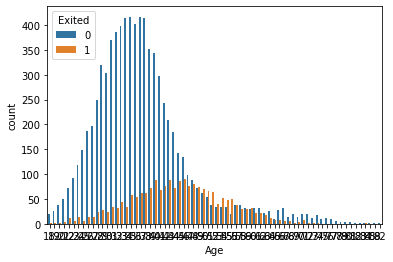

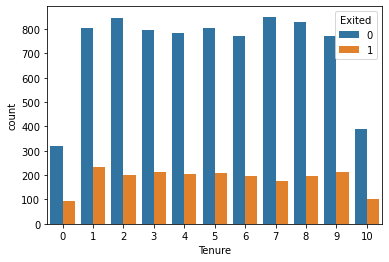

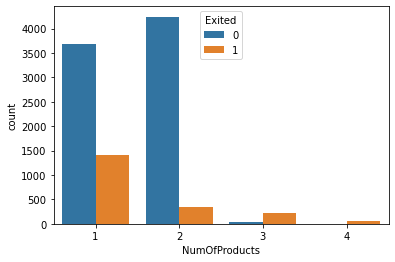

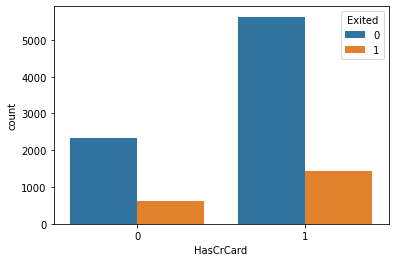

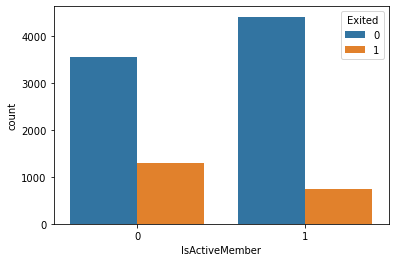

In [ ]:
#univariate analysis
for i,predictor in enumerate(df.drop(columns=['Exited','EstimatedSalary','Balance'])):
    plt.figure(i)
    sns.countplot(data=df,x=predictor, hue='Exited')

In [ ]:
df['Exited']=np.where(df.Exited=='Yes',1,0)

(array([7963.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2037.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

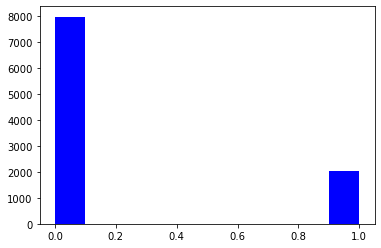

In [ ]:
plt.hist(df['Exited'],color='blue')

(array([4543.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5457.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

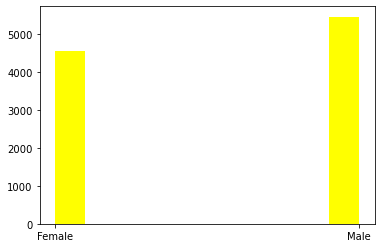

In [ ]:
plt.hist(df['Gender'],color='yellow')

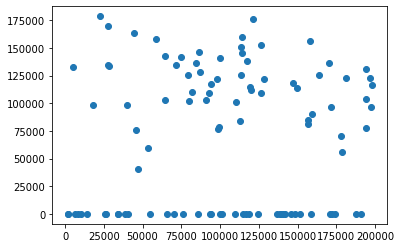

In [ ]:
#bivariate analysis
plt.scatter(df['EstimatedSalary'].head(100),df['Balance'].head(100))


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


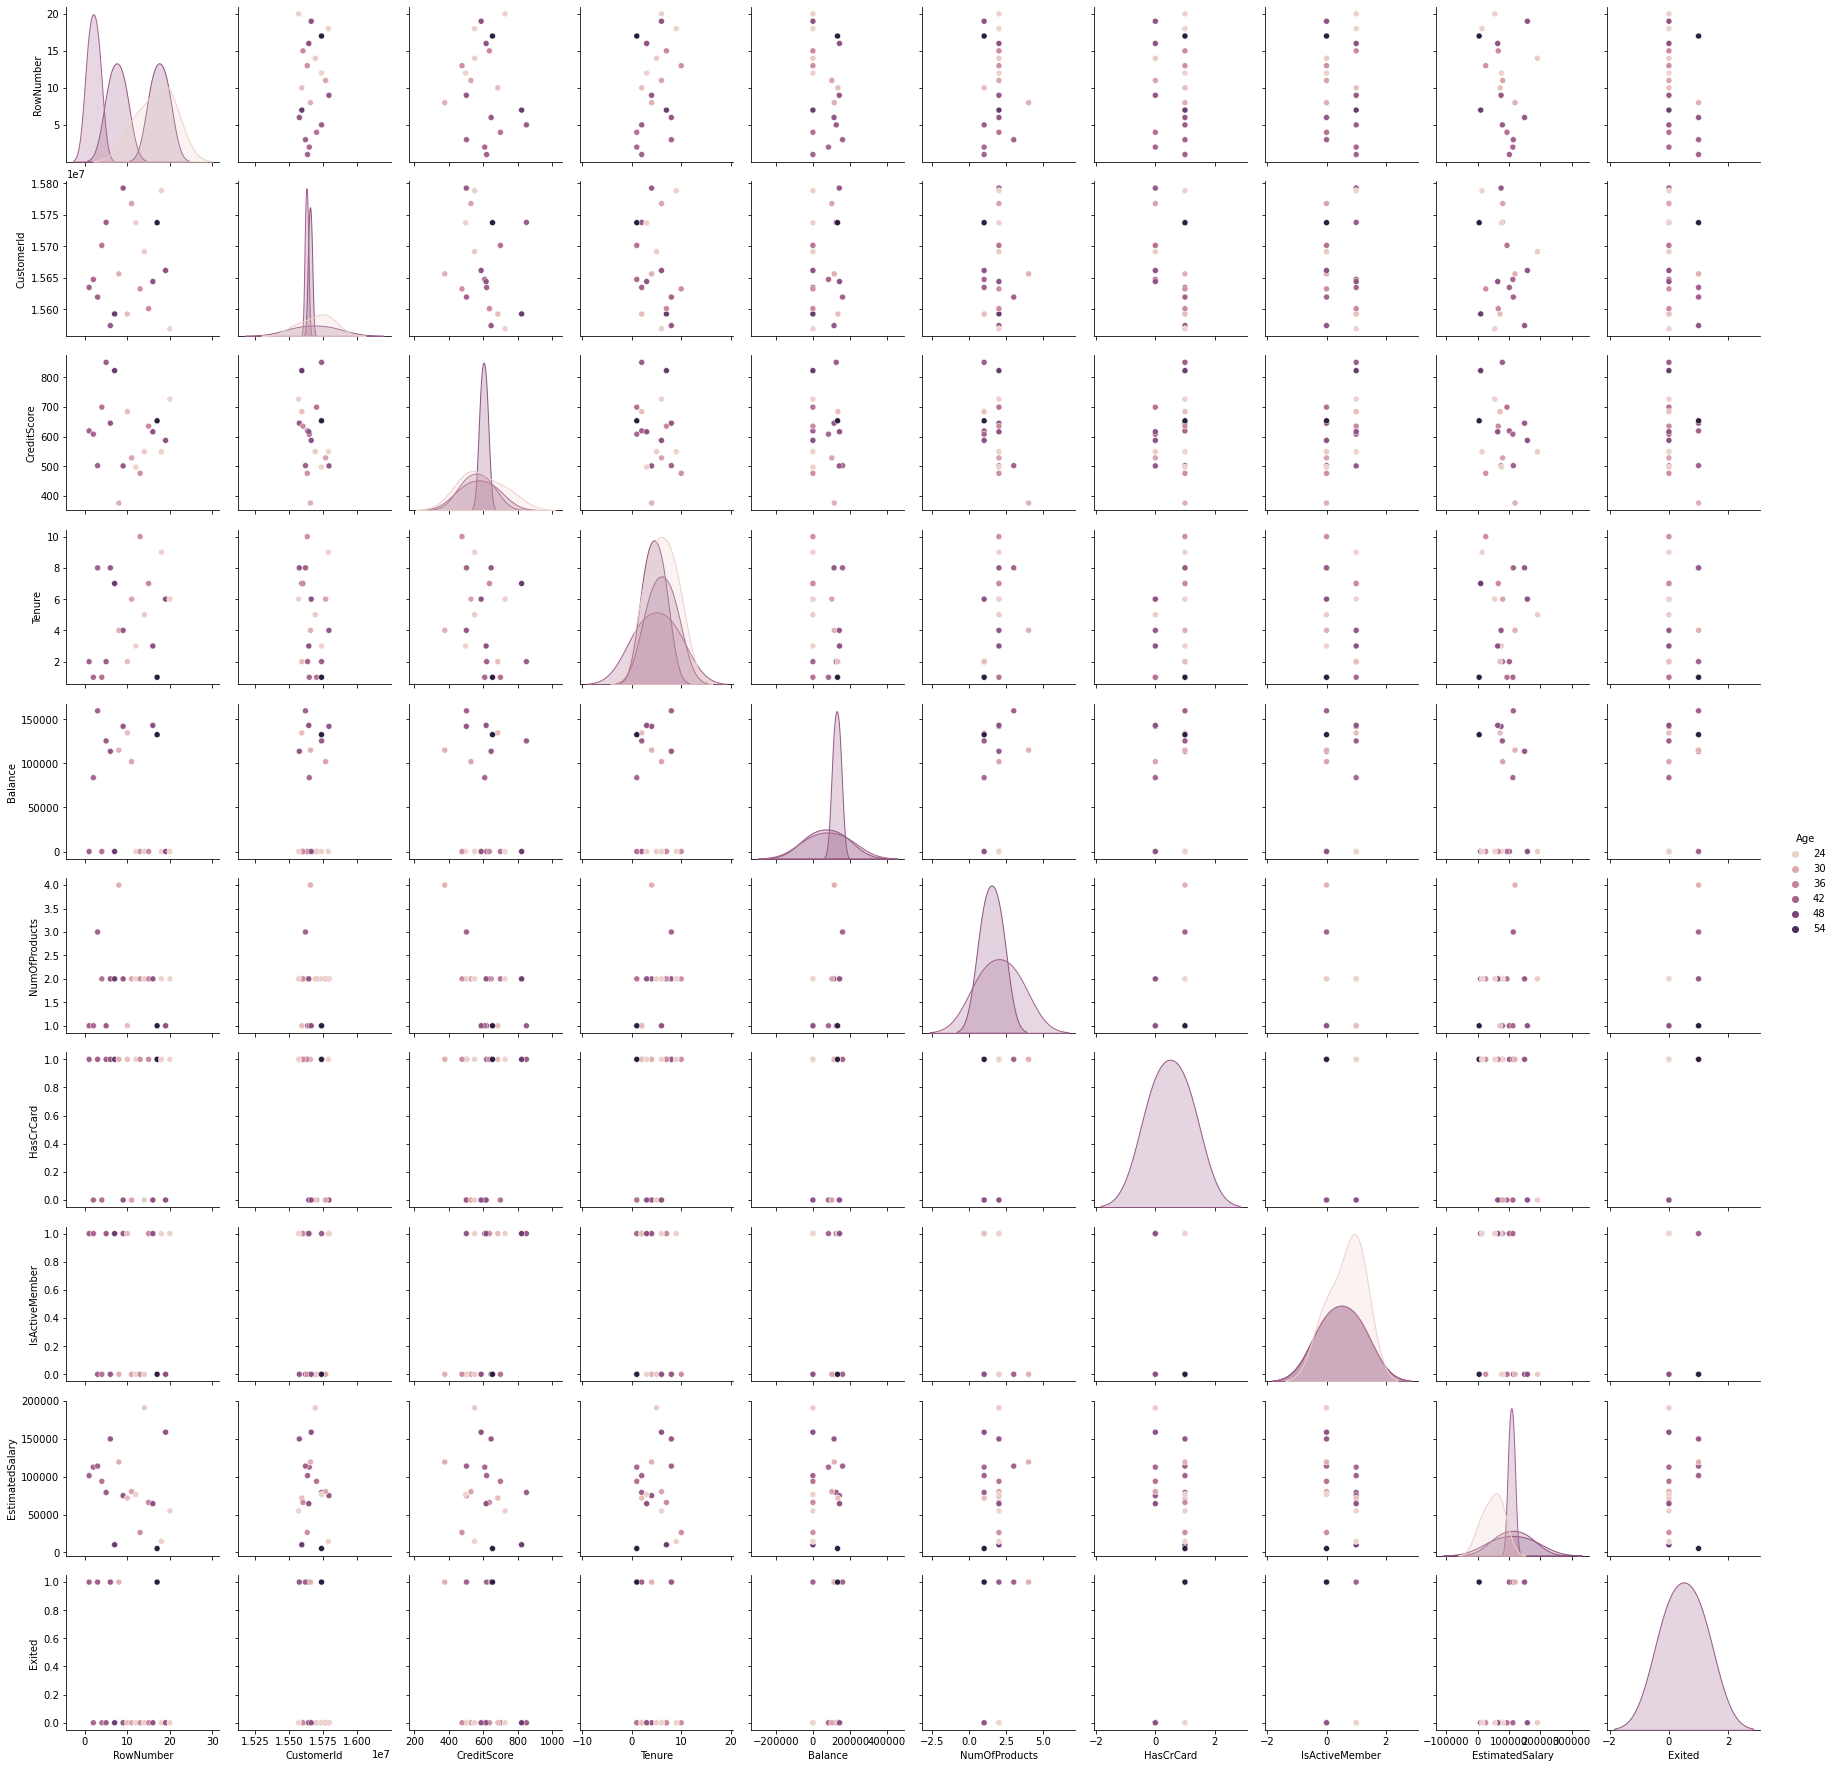

In [ ]:
sns.pairplot(df.head(20),hue='Age')

In [ ]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

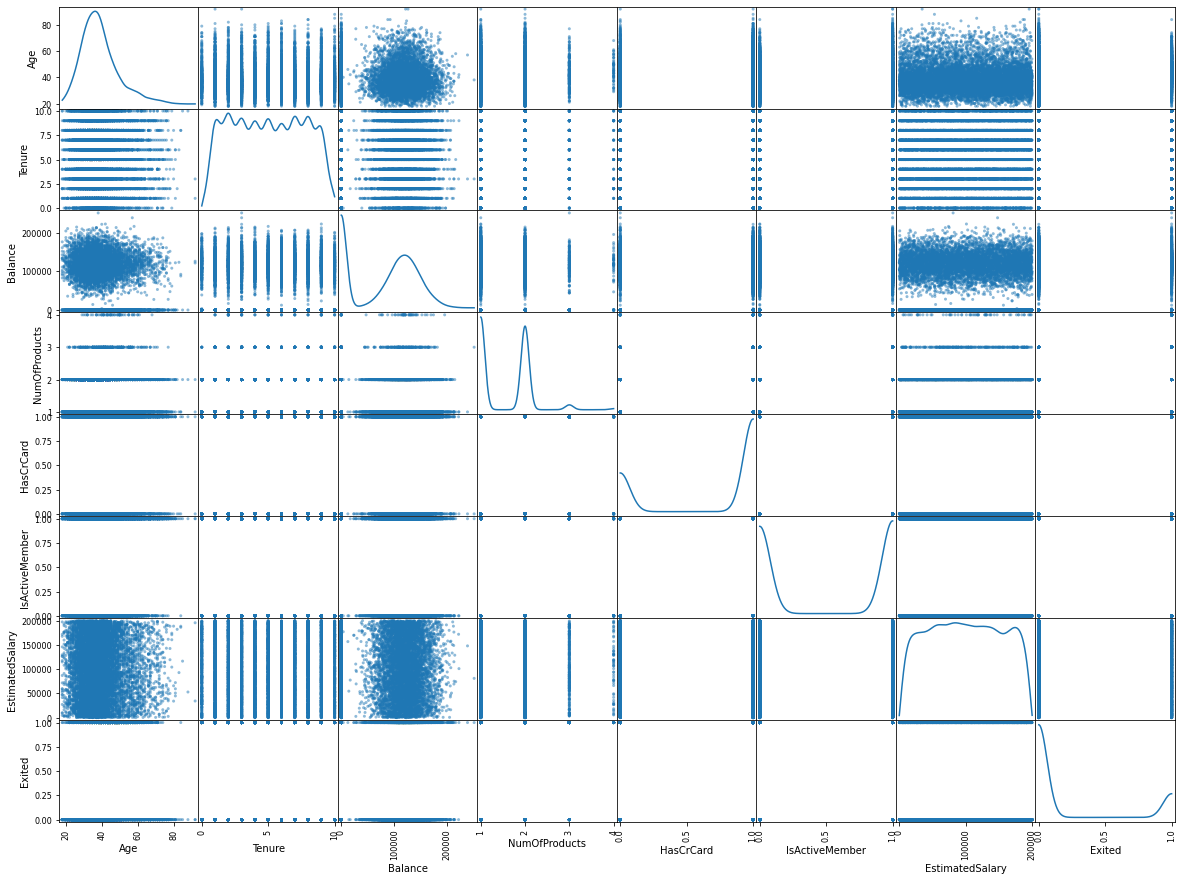

In [ ]:
#multivariate analysis
pd.plotting.scatter_matrix(df.loc[:, "Age":"Exited"], diagonal="kde",figsize=(20,15))
plt.show()

In [ ]:
#missing values
df.isnull().sum()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


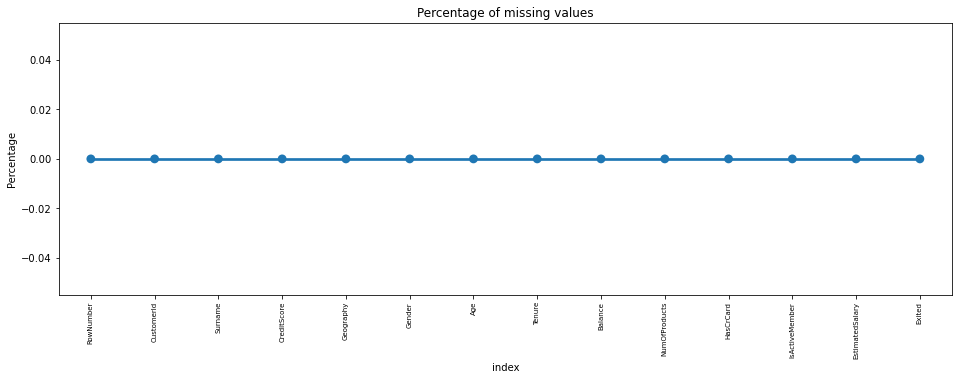

In [ ]:
missing=pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax= sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.title("Percentage of missing values")
plt.ylabel("Percentage")
plt.show()

In [ ]:
#removing missing values
df.dropna(how='any',inplace=True)

In [ ]:
#descriptive statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#encoding
df['Geography'].unique()


array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb=LabelEncoder()
df['Geography']=lb.fit_transform(df['Geography'])

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
pd.get_dummies(df,drop_first=True)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,0,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,...,0,0,0,0,0,0,0,0,0,1
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,...,0,0,0,0,0,0,0,0,0,1
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,...,0,0,0,0,0,0,0,0,0,0
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
#splitting data into dependent and independent variables
X=df.drop('Exited',axis=1)  #independent variables
y=df['Exited']              #target or dependent variables


In [ ]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
X_train.shape,X_test.shape

((8000, 13), (2000, 13))

In [ ]:
y_train.shape,y_test.shape

((8000,), (2000,))

In [ ]:
#scaling independent values
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()


In [ ]:
X_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7389,7390,15676909,Mishin,667,Spain,Female,34,5,0.00,2,1,0,163830.64
9275,9276,15749265,Carslaw,427,Germany,Male,42,1,75681.52,1,1,1,57098.00
2995,2996,15582492,Moore,535,France,Female,29,2,112367.34,1,1,0,185630.76
5316,5317,15780386,Ferri,654,Spain,Male,40,5,105683.63,1,1,0,173617.09
356,357,15611759,Simmons,850,Spain,Female,57,8,126776.30,2,1,1,132298.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,9226,15584928,Ugochukwutubelum,594,Germany,Female,32,4,120074.97,2,1,1,162961.79
4859,4860,15647111,White,794,Spain,Female,22,4,114440.24,1,1,1,107753.07
3264,3265,15574372,Hoolan,738,France,Male,35,5,161274.05,2,1,0,181429.87
9845,9846,15664035,Parsons,590,Spain,Female,38,9,0.00,2,1,1,148750.16
